NAME- DEVLINA PAL

LETSGROWMORE INTERNSHIP ADVANCED LEVEL TASK-2

In [2]:
import numpy as np
from nltk.tokenize import RegexpTokenizer
from keras.models import Sequential, load_model
from keras.layers import LSTM
from keras.layers.core import Dense, Activation
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import pickle
import heapq

In [3]:
##Loading the dataset
path = '1661-0.txt'
text = open(path).read().lower()
print('corpus length:', len(text))

corpus length: 581888


In [8]:
##Splitting the dataset into each word in order but without the presence of some special characters.
tokenizer = RegexpTokenizer(r'\w+')
words = tokenizer.tokenize(text)

In [9]:
words

['project',
 'gutenberg',
 's',
 'the',
 'adventures',
 'of',
 'sherlock',
 'holmes',
 'by',
 'arthur',
 'conan',
 'doyle',
 'this',
 'ebook',
 'is',
 'for',
 'the',
 'use',
 'of',
 'anyone',
 'anywhere',
 'at',
 'no',
 'cost',
 'and',
 'with',
 'almost',
 'no',
 'restrictions',
 'whatsoever',
 'you',
 'may',
 'copy',
 'it',
 'give',
 'it',
 'away',
 'or',
 're',
 'use',
 'it',
 'under',
 'the',
 'terms',
 'of',
 'the',
 'project',
 'gutenberg',
 'license',
 'included',
 'with',
 'this',
 'ebook',
 'or',
 'online',
 'at',
 'www',
 'gutenberg',
 'net',
 'title',
 'the',
 'adventures',
 'of',
 'sherlock',
 'holmes',
 'author',
 'arthur',
 'conan',
 'doyle',
 'release',
 'date',
 'november',
 '29',
 '2002',
 'ebook',
 '1661',
 'last',
 'updated',
 'may',
 '20',
 '2019',
 'language',
 'english',
 'character',
 'set',
 'encoding',
 'utf',
 '8',
 'start',
 'of',
 'this',
 'project',
 'gutenberg',
 'ebook',
 'the',
 'adventures',
 'of',
 'sherlock',
 'holmes',
 'produced',
 'by',
 'an',
 'ano

In [10]:
unique_words = np.unique(words)
unique_word_index = dict((c, i) for i, c in enumerate(unique_words))

FEATURE ENGINEERING

In [14]:
WORD_LENGTH = 5
prev_words = []
next_words = []
for i in range(len(words) - WORD_LENGTH):
    prev_words.append(words[i:i + WORD_LENGTH])
    next_words.append(words[i + WORD_LENGTH])
print(prev_words[0])
print(next_words[0])

['project', 'gutenberg', 's', 'the', 'adventures']
of


In [15]:
##Now I will create two numpy arrays x for storing the features and y for storing its corresponding label. 
##I will iterate x and y if the word is available so that the corresponding position becomes 1.
X = np.zeros((len(prev_words), WORD_LENGTH, len(unique_words)), dtype=bool)
Y = np.zeros((len(next_words), len(unique_words)), dtype=bool)
for i, each_words in enumerate(prev_words):
    for j, each_word in enumerate(each_words):
        X[i, j, unique_word_index[each_word]] = 1
    Y[i, unique_word_index[next_words[i]]] = 1


In [13]:
print(X[0][0])

[False False False ... False False False]


BUILDING THE RECURRENT NEURAL NETWORK

In [17]:
model = Sequential()
model.add(LSTM(128, input_shape=(WORD_LENGTH, len(unique_words))))
model.add(Dense(len(unique_words)))
model.add(Activation('softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 128)               4264960   
_________________________________________________________________
dense_1 (Dense)              (None, 8201)              1057929   
_________________________________________________________________
activation_1 (Activation)    (None, 8201)              0         
Total params: 5,322,889
Trainable params: 5,322,889
Non-trainable params: 0
_________________________________________________________________


TRAINING THE NEXT WORD PREDICTION MODEL

In [19]:
optimizer = RMSprop(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
history = model.fit(X, Y, validation_split=0.05, batch_size=128, epochs=20, shuffle=True).history

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/20
811/811 [==============================] - 312s 382ms/step - loss: 5.7871 - accuracy: 0.1748 - val_loss: 8.0215 - val_accuracy: 0.1078
Epoch 2/20
811/811 [==============================] - 297s 367ms/step - loss: 5.4429 - accuracy: 0.2092 - val_loss: 8.0537 - val_accuracy: 0.0990
Epoch 3/20
811/811 [==============================] - 299s 369ms/step - loss: 5.0997 - accuracy: 0.2488 - val_loss: 8.3657 - val_accuracy: 0.0990
Epoch 4/20
811/811 [==============================] - 290s 358ms/step - loss: 4.7988 - accuracy: 0.2886 - val_loss: 8.5980 - val_accuracy: 0.0912
Epoch 5/20
811/811 [==============================] - 289s 357ms/step - loss: 4.5524 - accuracy: 0.3258 - val_loss: 8.7278 - val_accuracy: 0.0877
Epoch 6/20
811/811 [==============================] - 289s 356ms/step - loss: 4.3455 - accuracy: 0.3629 - val_loss: 9.0025 - val_accuracy: 0.0881
Epoch 7/20
811/811 [==============================] - 289s 357ms/step - loss: 4.1502 - accuracy: 0.3976 - val_loss: 9.0035 -

In [20]:
##After successfully training our model, before moving forward to evaluating our model, 
##it will be better to save this model for our future use.
model.save('keras_next_word_model.h5')

model = load_model('keras_next_word_model.h5')


EVALUATING THE NEXT WORD PREDICTION MODEL

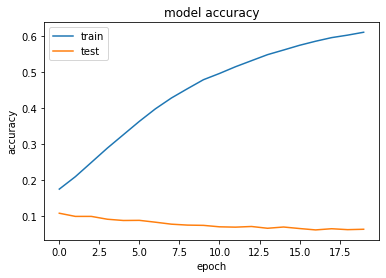

In [23]:
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

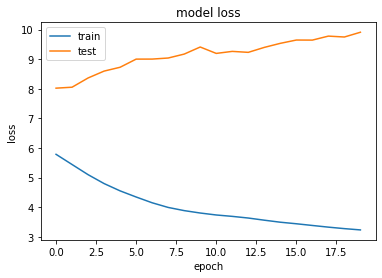

In [24]:
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

TESTING NEXT WORD PREDICTION MODEL

In [25]:
def prepare_input(text):
    x = np.zeros((1, WORD_LENGTH, len(unique_words)))
    for t, word in enumerate(text.split()):
        print(word)
        x[0, t, unique_word_index[word]] = 1
    return x
prepare_input("It is not a lack".lower())

it
is
not
a
lack


array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]])

In [26]:
unique_words[3010]

'for'

In [27]:
txt = input('Enter text :')

prepare_input(txt.lower())

Enter text :Snuffbox of old gold
snuffbox
of
old
gold


array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]])

In [28]:
txt.split()[-4:]

['Snuffbox', 'of', 'old', 'gold']

In [29]:
def pediction(model,tokenize,txt):
    sequence1 = tokenize.tokenize(txt)
    sequence = np.array(sequence1)
    print(sequence1)
    preds= np.argmax(model.predict(sequence1))
    pred_wods=""
    print(preds)

In [30]:
prepare_input('The Adventures of Sherlock Holmes'.lower())

the
adventures
of
sherlock
holmes


array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]])

In [34]:
unique_words[11]

'12_s_'

In [35]:
## Function to return samples

def sample(preds, top_n=3):
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds)
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)

    return heapq.nlargest(top_n, range(len(preds)), preds.take)

In [36]:
## Function for next word prediction

def predict_completion(text):
    original_text = text
    generated = text
    completion = ''
    while True:
        x = prepare_input(text)
        preds = model.predict(x, verbose=0)[0]
        next_index = sample(preds, top_n=1)[0]
        next_char = indices_char[next_index]
        text = text[1:] + next_char
        completion += next_char
        
        if len(original_text + completion) + 2 > len(original_text) and next_char == ' ':
            return completion

In [37]:
## This function is created to predict the next word until space is generated. 
## It will do this by iterating the input, which will ask our RNN model and extract instances from it. 
## Now I will modify the above function to predict multiple characters:-

def predict_completions(text, n=3):
    x = prepare_input(text)
    preds = model.predict(x, verbose=0)[0]
    next_indices = sample(preds, n)
    return [indices_char[idx] + predict_completion(text[1:] + indices_char[idx]) for idx in next_indices]